In [ ]:
# tutorial https://www.kaggle.com/code/jutrera/training-a-densenet-for-the-stanford-car-dataset/notebook#Confussion-Matrix

# https://www.kaggle.com/datasets/ahmedsorour1/mri-for-brain-tumor-with-bounding-boxes
# https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset
# https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification?select=test

#!pip install tensorflow # Installs the TensorFlow module
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from keras import metrics # Import the metrics module

In [ ]:
#tf.keras.backend.set_learning_phase(1)

img_width, img_height = 224, 224
#nb_train_samples = 1286
#nb_validation_samples = 323
epochs = 30
batch_size = 32
n_classes = 15
plt_size = 20

In [ ]:
train_data_dir = '/content/drive/My Drive/datasets/vegetables/train/'
validation_data_dir = '/content/drive/My Drive/datasets/vegetables/test/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #fill_mode = 'constant',
    #cval = 1,
    #rotation_range = 5,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip=True
    )

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


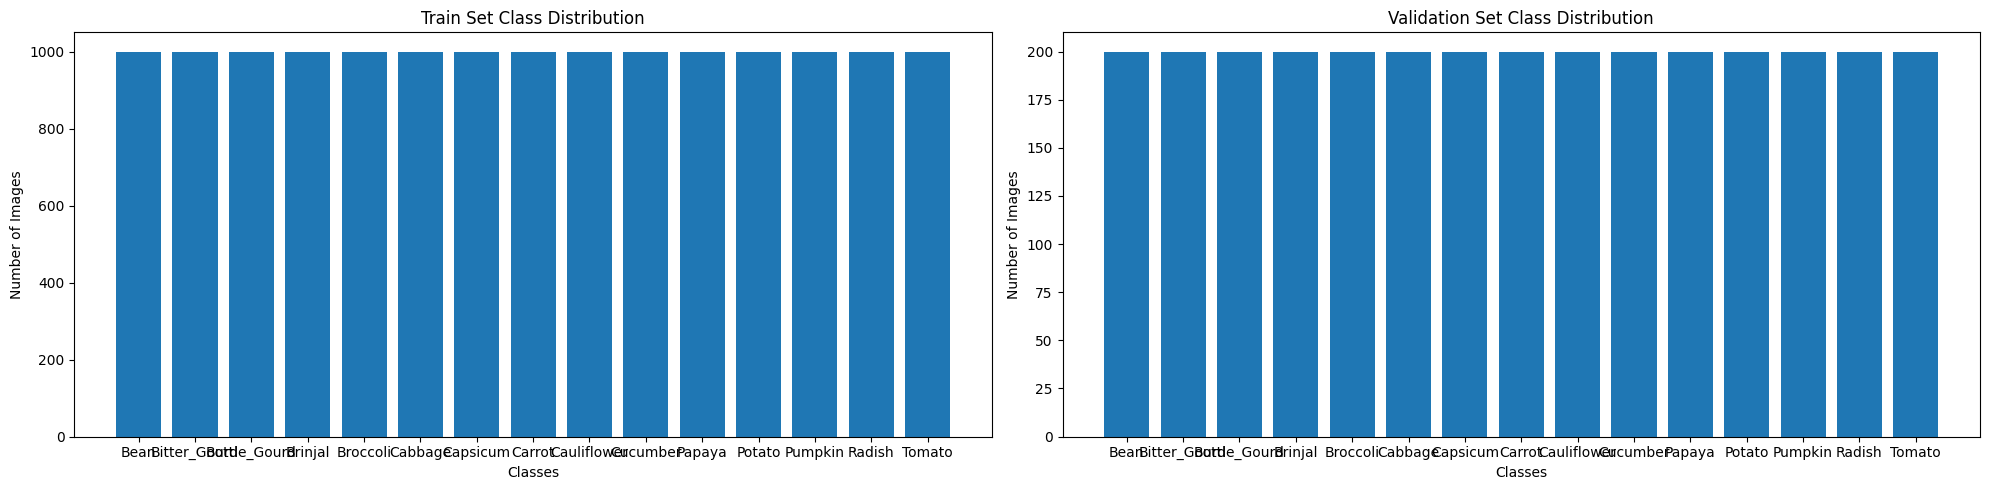

In [ ]:
# Get class counts for train_generator
train_class_counts = np.bincount(train_generator.classes)

# Get class counts for validation_generator (test_generator)
val_class_counts = np.bincount(validation_generator.classes)

# Get class labels
class_labels = list(train_generator.class_indices.keys())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(plt_size, 5))

# Plot histogram for train_generator
axes[0].bar(class_labels, train_class_counts)
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of Images')
axes[0].set_title('Train Set Class Distribution')

# Plot histogram for validation_generator
axes[1].bar(class_labels, val_class_counts)
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of Images')
axes[1].set_title('Validation Set Class Distribution')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
model= tf.keras.applications.densenet.DenseNet121(include_top=False)

# Freeze the base model's layers
for layer in model.layers:
    layer.trainable = False

# Add a new classification head
x = model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(n_classes, activation='softmax')(x)

# Create the new model
model = tf.keras.models.Model(inputs=model.input, outputs=predictions)


from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model_history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 13430s 28s/step - acc: 0.5421 - loss: 1.6933 - val_acc: 0.9633 - val_loss: 0.2105
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 120ms/step - acc: 0.9636 - loss: 0.1738 - val_acc: 0.9840 - val_loss: 0.0821
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 121ms/step - acc: 0.9872 - loss: 0.0578 - val_acc: 0.9910 - val_loss: 0.0434
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 122ms/step - acc: 0.9924 - loss: 0.0375 - val_acc: 0.9940 - val_loss: 0.0272
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 119ms/step - acc: 0.9950 - loss: 0.0217 - val_acc: 0.9980 - val_loss: 0.0153
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 119ms/step - acc: 0.9972 - loss: 0.0151 - val_acc: 0.9973 - val_loss: 0.0129
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 122ms/step - acc: 0.9982 - loss: 0.0093 - val_acc: 0.9980 - val_loss: 0.0098
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 119ms/step - acc: 0.9991 - loss: 0.0061 - val_acc: 0.9970 - val_loss: 0.0123
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 58

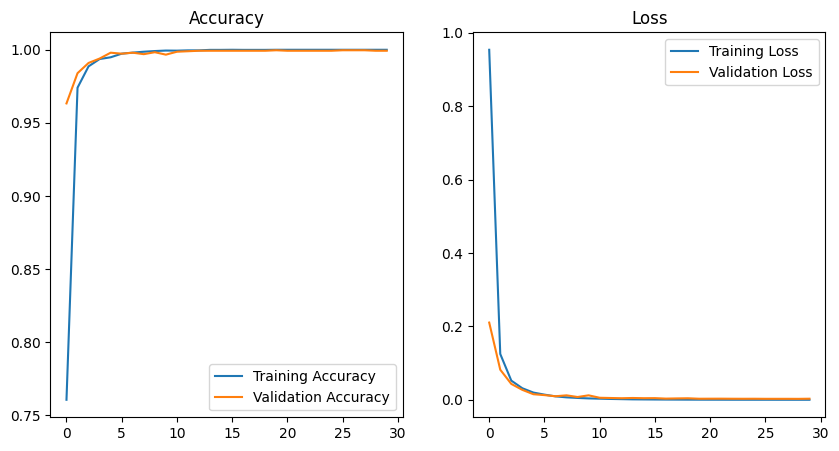

Validation Loss: 0.0030719346832484007
Validation Accuracy: 0.9993333220481873
Min Validation Loss: 0.002693117130547762
Max Validation Accuracy: 0.999666690826416


In [ ]:
#visualize training results

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

# evaluate the accuracy
score = model.evaluate(validation_generator, verbose=0)
print("Validation Loss: " + str(score[0]))
print("Validation Accuracy: " + str(score[1]))

print("Min Validation Loss: " + str(min(val_loss)))
print("Max Validation Accuracy: " + str(max(val_acc)))

94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - acc: 0.9988 - loss: 0.0053
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 174ms/step
Confusion Matrix


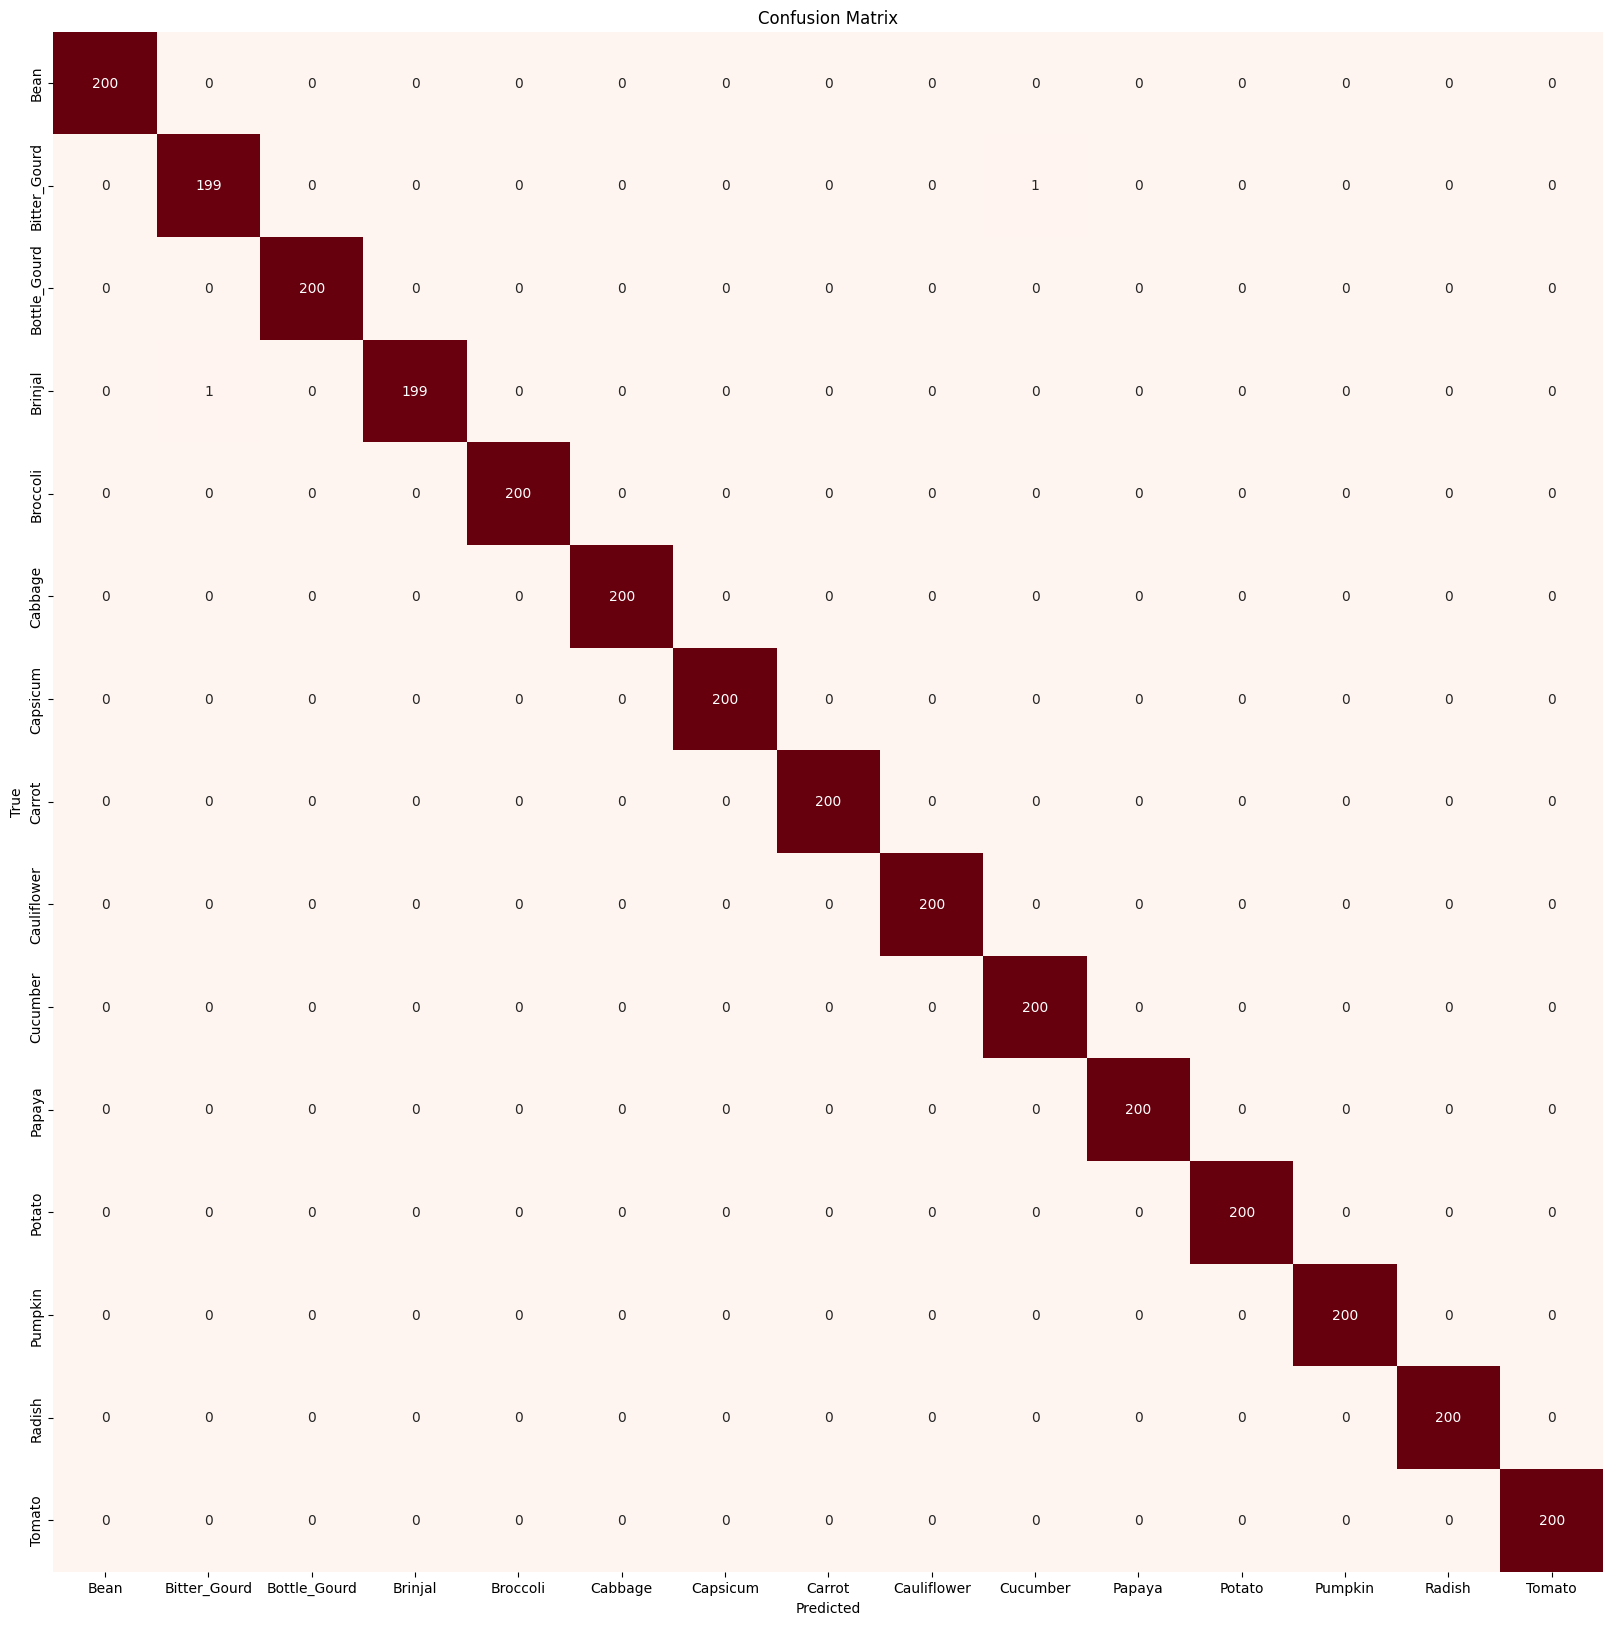

In [ ]:
# visualize the confusion matrix
import numpy as np

model.evaluate(validation_generator, steps=None)#, max_queue_size=10, workers=1, use_multiprocessing=False)

pred = model.predict(validation_generator, steps=None)#, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)

from sklearn.metrics import confusion_matrix

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

#show results
print('Confusion Matrix')
confusion = confusion_matrix(validation_generator.classes, predicted)
plt.figure(figsize = (plt_size,plt_size))
sn.heatmap(confusion, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report

# Calculate precision and recall for each class
precision_per_class = precision_score(validation_generator.classes, predicted, average=None)
recall_per_class = recall_score(validation_generator.classes, predicted, average=None)

# Display precision and recall for each class
for i, class_label in enumerate(class_labels):
    print(f"Class: {class_label}")
    print(f"Precision: {precision_per_class[i]:.2f}")
    print(f"Recall: {recall_per_class[i]:.2f}")
    print("------------")

# Calculate and display overall precision and recall
overall_precision = precision_score(validation_generator.classes, predicted, average='weighted')
overall_recall = recall_score(validation_generator.classes, predicted, average='weighted')

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)

# Generate a classification report
classification_rep = classification_report(validation_generator.classes, predicted, target_names=class_labels)
print("Classification Report:\n", classification_rep)

Class: Bean
Precision: 1.00
Recall: 1.00
------------
Class: Bitter_Gourd
Precision: 0.99
Recall: 0.99
------------
Class: Bottle_Gourd
Precision: 1.00
Recall: 1.00
------------
Class: Brinjal
Precision: 1.00
Recall: 0.99
------------
Class: Broccoli
Precision: 1.00
Recall: 1.00
------------
Class: Cabbage
Precision: 1.00
Recall: 1.00
------------
Class: Capsicum
Precision: 1.00
Recall: 1.00
------------
Class: Carrot
Precision: 1.00
Recall: 1.00
------------
Class: Cauliflower
Precision: 1.00
Recall: 1.00
------------
Class: Cucumber
Precision: 1.00
Recall: 1.00
------------
Class: Papaya
Precision: 1.00
Recall: 1.00
------------
Class: Potato
Precision: 1.00
Recall: 1.00
------------
Class: Pumpkin
Precision: 1.00
Recall: 1.00
------------
Class: Radish
Precision: 1.00
Recall: 1.00
------------
Class: Tomato
Precision: 1.00
Recall: 1.00
------------
Overall Precision: 0.9993349917081261
Overall Recall: 0.9993333333333333
Classification Report:
               precision    recall  f1-s

In [ ]:
model.save('/content/drive/My Drive/saved_models/DenseNet_vegetables.keras')